# Proyecto EasyVisa

## Contexto:

Las comunidades empresariales en los Estados Unidos se enfrentan a una gran demanda de recursos humanos, pero uno de los desafíos constantes es identificar y atraer el talento adecuado, que es quizás el elemento más importante para seguir siendo competitivo. Las empresas en los Estados Unidos buscan personas trabajadoras, talentosas y calificadas tanto a nivel local como en el extranjero.

La Ley de Inmigración y Nacionalidad (INA) de los EE. UU. permite que los trabajadores extranjeros vengan a los Estados Unidos a trabajar de manera temporal o permanente. La ley también protege a los trabajadores estadounidenses contra impactos adversos en sus salarios o condiciones de trabajo al garantizar el cumplimiento de los requisitos legales por parte de los empleadores estadounidenses cuando contratan trabajadores extranjeros para cubrir la escasez de mano de obra. Los programas de inmigración son administrados por la Oficina de Certificación de Trabajo Extranjero (OFLC).

OFLC procesa las solicitudes de certificación laboral para los empleadores que buscan traer trabajadores extranjeros a los Estados Unidos y otorga certificaciones en aquellos casos en los que los empleadores pueden demostrar que no hay suficientes trabajadores estadounidenses disponibles para realizar el trabajo con salarios que alcanzan o superan el salario pagado por la ocupación. en el área de empleo previsto.

## Objetivo:

En el año fiscal 2016, la OFLC procesó 775 979 solicitudes de empleadores para 1 699 957 puestos para certificaciones laborales temporales y permanentes. Este fue un aumento del nueve por ciento en el número total de solicitudes procesadas con respecto al año anterior. El proceso de revisión de cada caso se está convirtiendo en una tarea tediosa ya que el número de solicitantes aumenta cada año.

El creciente número de solicitantes cada año requiere una solución basada en aprendizaje automático que pueda ayudar a preseleccionar a los candidatos que tienen mayores posibilidades de aprobación de VISA. OFLC ha contratado a su empresa EasyVisa para soluciones basadas en datos. Usted, como científico de datos, debe analizar los datos proporcionados y, con la ayuda de un modelo de clasificación:

*Facilitar el proceso de aprobación de visas.* Recomendar un perfil adecuado para los solicitantes a quienes se les debe certificar o denegar la visa en función de los factores que influyen significativamente en el estado del caso.


## Datos Descripción

Los datos contienen los diferentes atributos del empleado y del empleador. El diccionario de datos detallado se proporciona a continuación.

* case_id: ID de cada solicitud de visa
* continent: Información del continente del empleado
* education_of_employee: Información de educación del empleado
* has_job_experience: ¿El empleado tiene alguna experiencia laboral? S= Sí; N = No
* require_job_training: ¿El empleado requiere alguna capacitación laboral? S = Sí; N = No
* no_de_employees: Número de empleados en la empresa del empleador
* yr_of_estab: Año en que se constituyó la empresa del empleador
* region_of_employment:: información de la región prevista de empleo del trabajador extranjero en los EE. UU.
* prevailing_wage: Salario promedio pagado a trabajadores empleados de manera similar en una ocupación específica en el área de empleo prevista. El propósito del salario prevaleciente es asegurar que el trabajador extranjero no esté mal pagado en comparación con otros trabajadores que ofrecen el mismo servicio o un servicio similar en la misma área de empleo.
* unit_of_wage: Unidad de salario prevaleciente. Los valores incluyen por salario por hora, Semanal, Mensual y Anual.
* full_time_position: ¿El puesto de trabajo es de tiempo completo? Y = Puesto de tiempo completo; N = Puesto a tiempo parcial
* case_status: Indicador que indica si la Visa fue certificada o denegada

## Planteamineto del problema

El problema que se busca resolver es la optimización del proceso de aprobación de visas para trabajadores extranjeros en los Estados Unidos. Dado el crecimiento constante en el número de solicitantes, la Oficina de Certificación de Trabajo Extranjero (OFLC) necesita una solución basada en aprendizaje automático que pueda preseleccionar a los candidatos con mayores posibilidades de aprobación de visa. El objetivo es agilizar y mejorar el proceso de revisión de casos, identificando perfiles que cumplen con los requisitos legales y tienen más probabilidades de recibir la certificación laboral.

Lo que deberíamos buscar es un modelo de clasificación efectivo que pueda analizar diferentes atributos del empleado y del empleador para hacer predicciones precisas sobre si una solicitud de visa debería ser certificada o denegada. Algunos de los factores a considerar podrían ser la educación del empleado, la experiencia laboral, el tamaño y la antigüedad de la empresa empleadora, la región de empleo previsto y el salario prevaleciente. El modelo debe ser capaz de generalizar a partir de datos históricos y aprender patrones que indiquen el éxito o fracaso de una solicitud.

Además, es crucial buscar un equilibrio en el modelo para evitar sesgos y asegurar que la toma de decisiones no esté sesgada hacia ciertos grupos. La transparencia y la interpretabilidad del modelo también son aspectos importantes para garantizar la confianza y comprensión de las decisiones tomadas.

### Elección de la métrica a utilizar
Dado el contexto de la aprobación de visas, donde el objetivo es optimizar la eficiencia del proceso de selección de candidatos, la métrica F1-score puede ser una opción adecuada para evaluar el rendimiento del modelo de clasificación. La F1-score proporciona un equilibrio entre precisión y recall, lo cual es valioso cuando se trata de tomar decisiones sobre aprobación de visas.

Razones para considerar F1-score:

* **Desequilibrio de Clases**: En este escenario, es probable que haya un desequilibrio entre las solicitudes de visa aprobadas y denegadas. La F1-score es especialmente útil cuando existe una clase minoritaria (por ejemplo, solicitudes aprobadas) que queremos asegurarnos de manejar de manera efectiva sin sacrificar demasiado la precisión.
* **Costos Equilibrados**: La F1-score considera tanto los falsos positivos como los falsos negativos, lo que es crucial cuando los costos asociados con estos errores son equitativos o cuando deseamos un equilibrio general en la toma de decisiones.
* **Énfasis en la Calidad y Cantidad**: Al buscar un modelo que maximice tanto la precisión como el recall, la F1-score es una métrica que puede ayudar a lograr un equilibrio óptimo, ya que penaliza los modelos que favorecen en exceso la precisión o el recall a expensas del otro.

## Importación de bibliotecas y datos necesarios

### Librerías necesarias

In [348]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

from datetime import datetime

from sklearn.preprocessing import LabelEncoder, StandardScaler

### Funciones necesarias

#### Histogramas, barplots avanzados y distribution plots

In [377]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10, 7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        #figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, plt = plt):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Classification y Confusion Matrix Functions (Scikit-Learn)

In [350]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Carga de datos

- Lectura del archivo CSV
- Creación del dataset para utilizarlo en el análisis

In [351]:
# Cargamos el CSV con los datos de EasyVisa
data = pd.read_csv('/content/EasyVisa.csv')

## Exploración inicial de datos

In [352]:
# Explorar datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [353]:
# Forma del dataset
data.shape

(25480, 12)

In [354]:
# Descripción de las columnas numéricas del dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [355]:
# Cabeza de la data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [356]:
# Cola de la data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [357]:
# Revision de NA's
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [358]:
# Revision de duplicados
data.duplicated().sum()

0

In [359]:
# Revision de valores únicos
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

**Observacion:**
* La data tiene 25480 filas distribuidas en 12 columnas
* No existen valores nulos ni duplicados
* Existe una columan de ID del caso que deberá ser removida, puesto que no presenta valor para el análisis
* Sólo existen 3 columnas numéricas, el resto son del tipo `object`. Se deberán transformar en categorías previo al Análisis Exploratorio de Datos.
* La columna numérica `no_of_employees` tiene un error, puesto que tiene valores negativos. Se transformará utilizando la media.
* La columna numérica `yr_of_estab` será transfirmada para calcular el número de años que tiene la companía en vez del año de fundación. Lo que permitirá resolver preguntas más interesantes.
* La columna numérica `prevailing_wage` no será utilizada en el análisis
* La data muestra que las personas que solicitan vista provienen de 6 continentes distintos
* Existen varias variables con valores binarios

### Transformación de datos

#### Corrección de tipos de datos `object`

In [360]:
cols = data.select_dtypes(['object'])
cols.columns

for i in cols.columns:
    data[i] = data[i].astype('category')

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


#### Eliminación de registros de identificación

In [362]:
# Quitamos la columna case_id y prevailing_wage
data.drop(['case_id'], axis = 1, inplace = True)

#### Ingeniería de características

In [363]:
# Calcular la antigüedad de la empresa en años hasta la fecha actual
current_year = datetime.now().year
data['company_age'] = current_year - data['yr_of_estab']

# Eliminar la columna irrelevante
data = data.drop('yr_of_estab', axis=1)

#### Revisión de variables con valores extraños

In [364]:
# Revisamos el número de registros de empresas que tienen valores negativos en el número de empleados
data[data['no_of_employees']<0].shape

(33, 11)

In [365]:
# Corregimos la variable con sus valores absolutos, asumiendo que fue un error en el traspaso de información o de tipeo
data['no_of_employees'] = data['no_of_employees'].abs()

In [366]:
# Revisamos como ha quedado la corrección
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
company_age,25480.0,43.590071,42.366929,7.0000,18.00,26.00,47.0000,223.00


**Observación:**
- Se cambiaron las columnas de tipo `object` y se dejaron como `category`, lo que permitirá un mejor análisis posterior
- Se quita la columnas `case_id` y se deja momentaneamente `prevailing_wage`. La primerea, por ser un identificador del caso de visa en cuestión y, la segunda, será quitada más adelante debido a que no se cuenta con la claridad necesaria en los datos para saber cómo es pagado el monto de dinero.
- Se agrega la variable `company_age` para conocer la cantidad de años que tiene la compañía al día de hoy y si este valor influye en la otorgación de la visa.
- Se elimina la variable `yr_of_estab`, debido a que no aporta valor adicional.
- Se corrige la variable `no_of_employees` con sus valores absolutos. Fueron 33 registros afectados.

## Análisis exploratorio de datos (EDA)


**Preguntas capciosas**:
1. Las personas con educación superior pueden querer viajar al extranjero por un trabajo bien remunerado. ¿La educación juega un papel en la certificación de Visa?

2. ¿Cómo varía el estado de la visa en los diferentes continentes?

3. Los profesionales experimentados pueden buscar oportunidades en el extranjero para mejorar su estilo de vida y desarrollo profesional. ¿La experiencia laboral influye en el estado de la visa?

4. En los Estados Unidos, a los empleados se les paga en diferentes intervalos. ¿Qué unidad de pago es más probable que se certifique para una visa?

5. El gobierno de los Estados Unidos ha establecido un salario prevaleciente para proteger el talento local y los trabajadores extranjeros. ¿Cómo cambia el estado de la visa con el salario prevaleciente?

### Comportamiento univariado de cada una de las columnas del dataset

#### Número de empleados que tienen las empresas (`no_of_employees`)

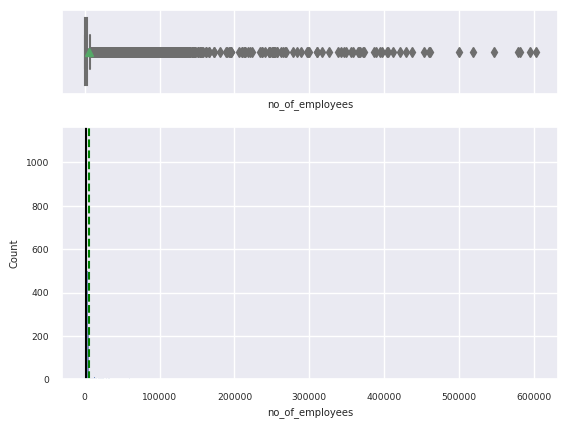

In [302]:
histogram_boxplot(data, "no_of_employees")

In [303]:
data['no_of_employees'].describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

**Observación:**
- Las empresas tienen entre 11 y 602,069 empleados
- El promedio de empleados por compañía es 5,667
- Existen muchos outliers en la data, lo que deberá ser analizado más adelante
- La variable presenta una distribución sesgada hacia la derecha, evidenciada por un valor medio (mean) significativamente mayor que la mediana (50%), y un rango intercuartílico (IQR) amplio.
- Además, la presencia de valores atípicos es notable, ya que el máximo es considerablemente mayor que el tercer cuartil (75%). Este sesgo y la presencia de outliers indican una distribución con una cola derecha pronunciada.

#### Edad de las empresas a las cuales postulan las personas (`company_age`)

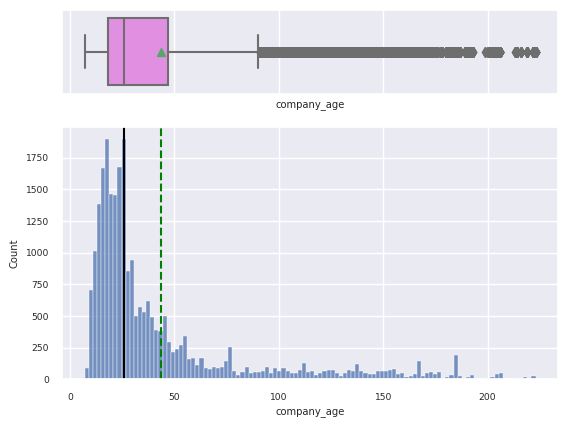

In [304]:
histogram_boxplot(data, "company_age")

In [305]:
data['company_age'].describe()

count    25480.000000
mean        43.590071
std         42.366929
min          7.000000
25%         18.000000
50%         26.000000
75%         47.000000
max        223.000000
Name: company_age, dtype: float64

**Observación:**
- La edad de las compañías varía entre 7 y 223 años
- El promedio de edad es de 43,6 años y el 50% de las empresas tienen 26 años de edad.
- Existen outiers en la data, sin embargo, data la naturaleza de estos resultados, parece que la variable company_age no tiene una presencia sustancial de outliers extremos.

#### Detalle de los sueldos y su distribución

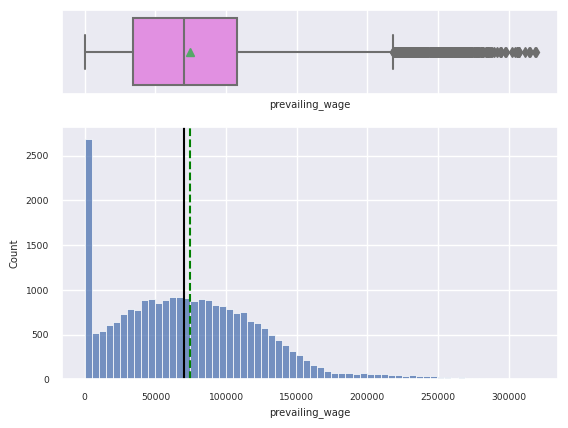

In [367]:
histogram_boxplot(data, "prevailing_wage")

In [368]:
data['prevailing_wage'].describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

**Observación:**
- La variable tiene una distribución normal. Sin embargo, existen muchos outliers y valores muy bajos.
- De hecho, el rango intercuartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es amplio. Esto indica una dispersión significativa en la parte central de la distribución
- La media de salarios es de $74,455 dólares, pero existe una alta distribución estándar, por lo que justifica que estos valores no sean muy útiles para el análisis y tendrá que quitarse más adelante.

#### Continente desde donde provienen las solicitudes de visa (`continent`)

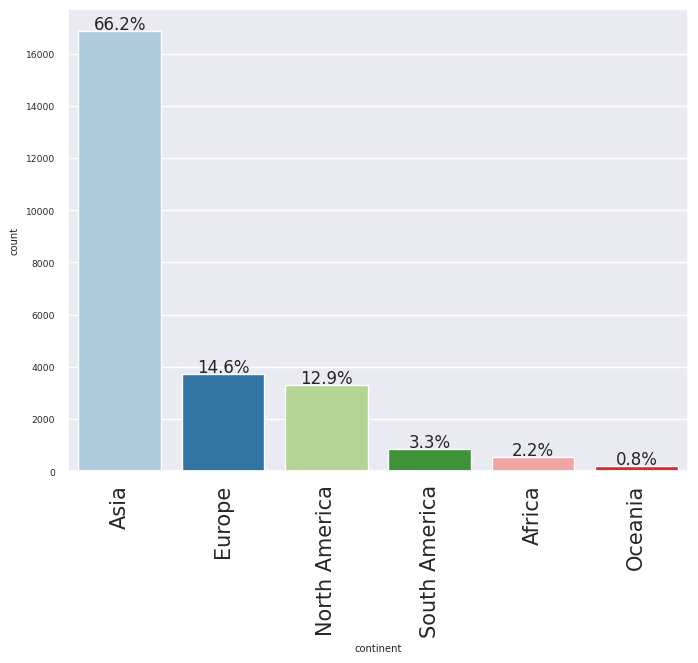

In [318]:
labeled_barplot(data, "continent", perc=True)

**Observación:**
- El 62.2% de las solicitudes provienen del continente asiático, seguidos por europeos (14.6%) y América del Norte (12.9%)

#### Nivel de educación de los postulantes a visa (`education_of_employee`)

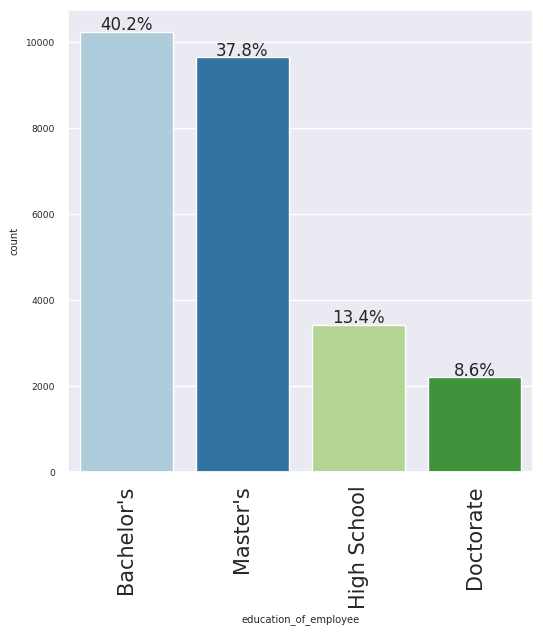

In [319]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observación:**
- El 78% de las postulaciones tienen estudios terciarios, lo que da a entender que la mayoría de las personas que postula a visa es mano de obra calificada.

#### Experiencia laboral (`has_job_experience`)

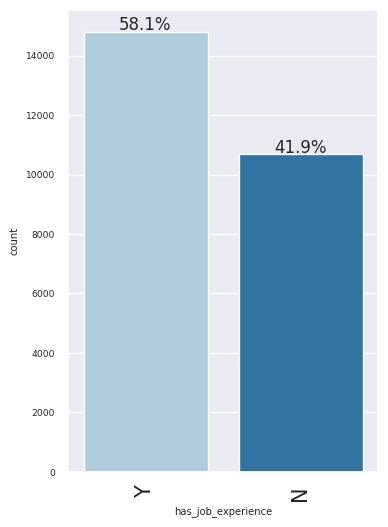

In [322]:
labeled_barplot(data, "has_job_experience", perc=True)

**Observación:**
- El 58.1% de las personas que postula a la visa tiene experiencia laboral. Cabe notar, que el 41.9% no la tiene.
- Comparándolo con el nivel educacional, podría indicar que las personas que postulan son jóvenes sin experiencia laboral, pero calificados con Bachelor's o Master's degree. Resultará interesante de ver el análisis bi-variado.

#### Entrenaniento requerido por la empresa (`requires_job_training`)

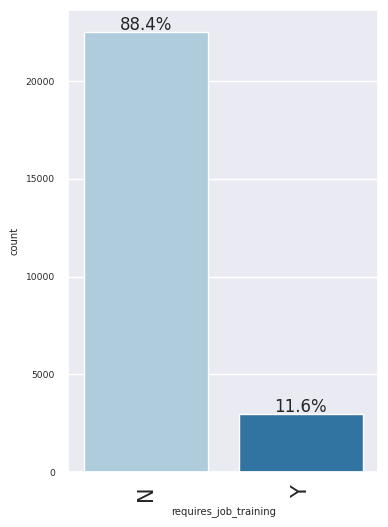

In [324]:
labeled_barplot(data, "requires_job_training", perc=True)

**Observación:**
- La mayoría de los trabajos a los que se postulan las personas no solicitan tener entrenamiento especial.

#### Lugar donde se encuentra la oferta laboral (`region_of_employment`)

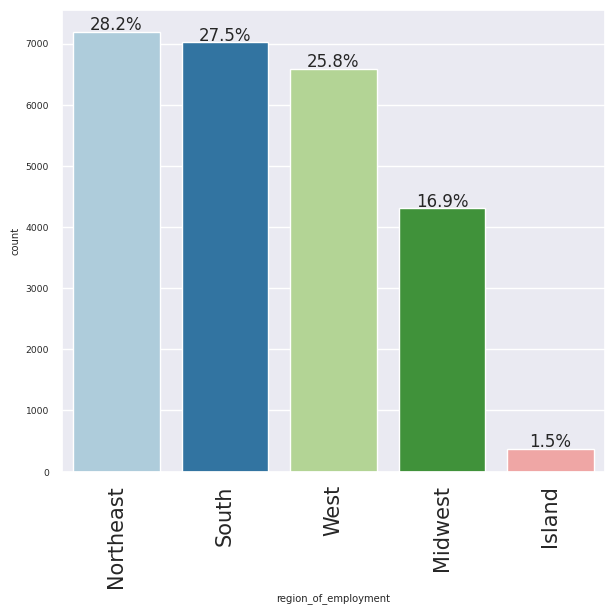

In [326]:
labeled_barplot(data, "region_of_employment", perc=True)

**Observación:**
- La mayor cantidad de solcitudes de visa están asociadas a trabajos en el Noreste de Estados Unidos (28.2%), seguidos del sur (27.5%) y el oeste (25.8%).
- Muy pocas postulaciones (1.5%) van asociadas a trabajos en la parte insular de Estados Unidos.

#### Forma de pago de la remuneración (`unit_of_wage`)

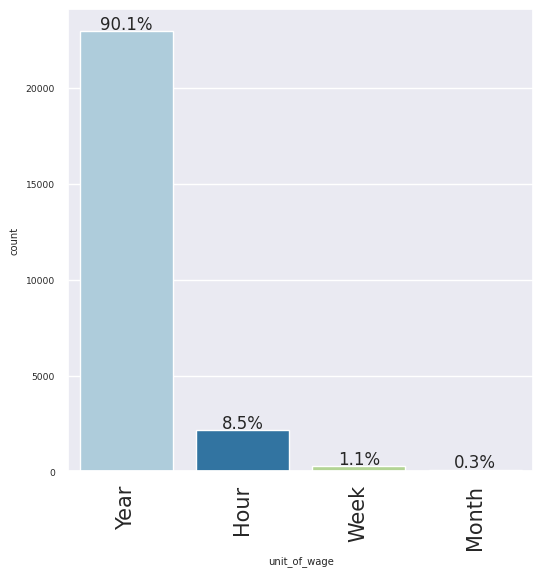

In [328]:
labeled_barplot(data, "unit_of_wage", perc=True)

**Observación:**
- Más del 90% de las postulaciones viene dada a trabajos que son remunerados anualmente. Lo que podría ser un indicio que la oferta de empleo es para personas que busquen residencia permanente más que una oferta temporal.

#### Tipo de trabajo solicitado (`full_time_position`)

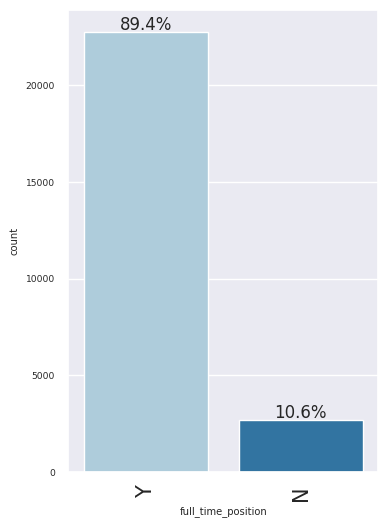

In [330]:
labeled_barplot(data, "full_time_position", perc=True)

**Observación:**
- El 89.4% de las ofertas laborales son para trabajos tiempo completo.
- Lo anterior, tiene coincidencia con la forma de pago vista anteriormente.

#### Estado de la aceptación de la solicitud visa (`case_status`)

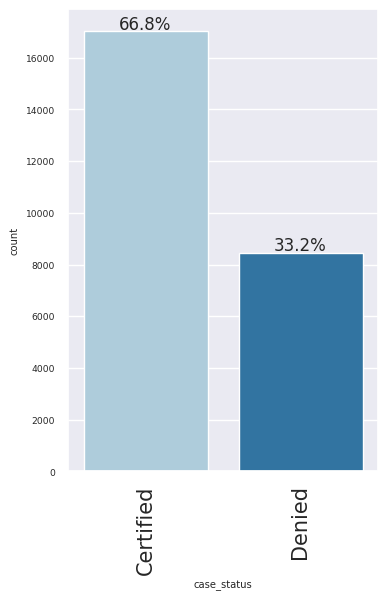

In [331]:
labeled_barplot(data, "case_status", perc=True)

**Observación:**
- De las solicitudes presentadas, el 66.8% han sido aceptadas, dejando el 33.2% denegada.

### Análisis bi-variado del Dataset

#### Matriz de correlación entre los datos

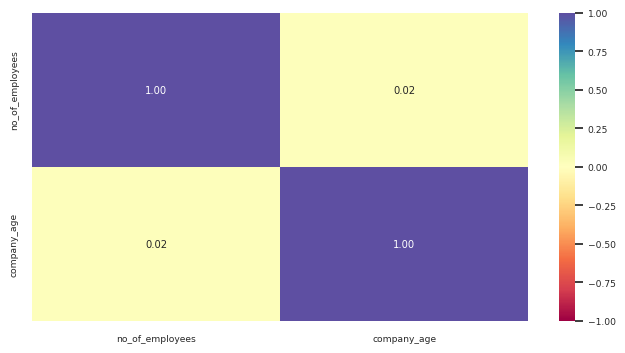

In [333]:
plt.figure(figsize=(8, 4))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

**Observación:**
- Lamentablemente, de las variables numéricas no podemos obtener un análisis interesante luego de realizar una matriz de correlación.

#### Relación entre continentes y el estado de la solicitud de visa

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


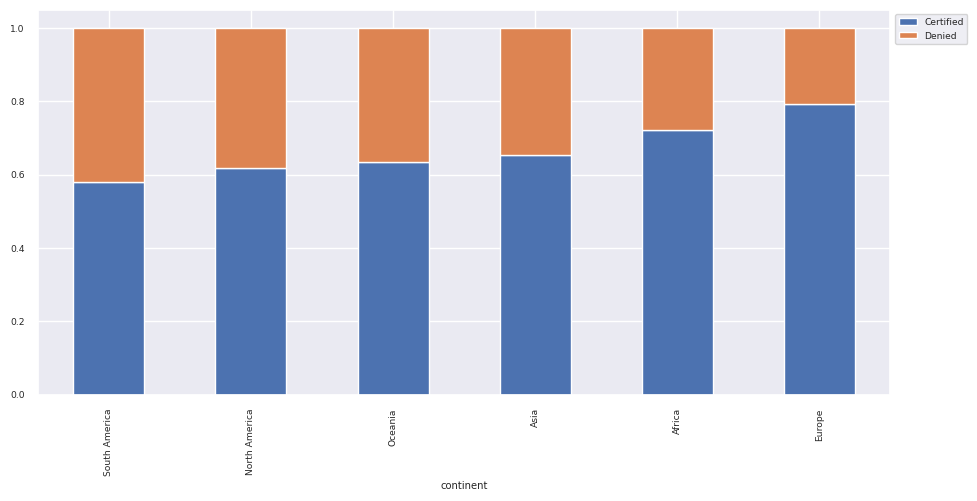

In [337]:
stacked_barplot(data, "continent", "case_status", si)

**Observación:**
- Como vimos en el análisis univariado, la mayor cantidad de solicitudes viene de Asia, pero no son de las más rechazadas.
- Porcentualmente, la mayor cantidad de rechazos proviene de Sudamérica
- Así mismo, porcentualmente, mayor cantidad de aceptaciones viene de Europa.

#### Relación entre la educación del empleado y el estado de la solicitud de visa

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


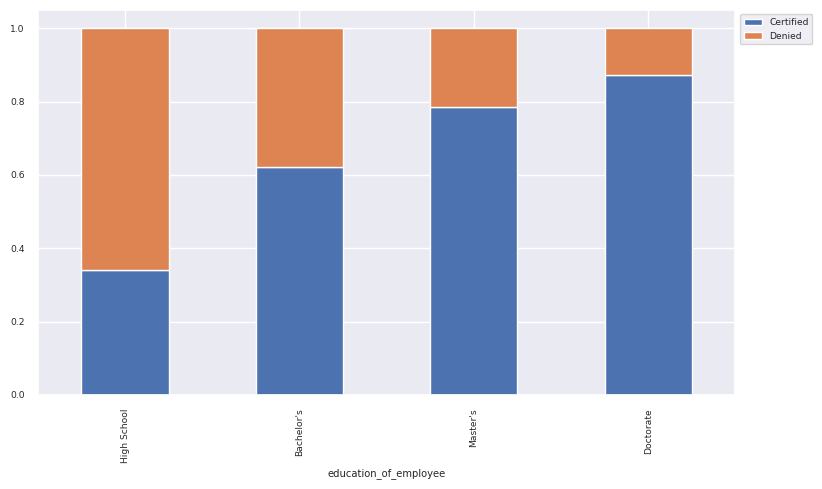

In [338]:
stacked_barplot(data, "education_of_employee", "case_status")

**Observación:**
- La mayor tasa de aceptación viene dada por personas con un grado académico adicional al de pregrado.
- Así mismo, la tasa de rechazo es de un ~66% en el caso que el postulante sólo tenga completa la educación secundaria.

#### Región del empleo y estado de la solicitud de visa

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


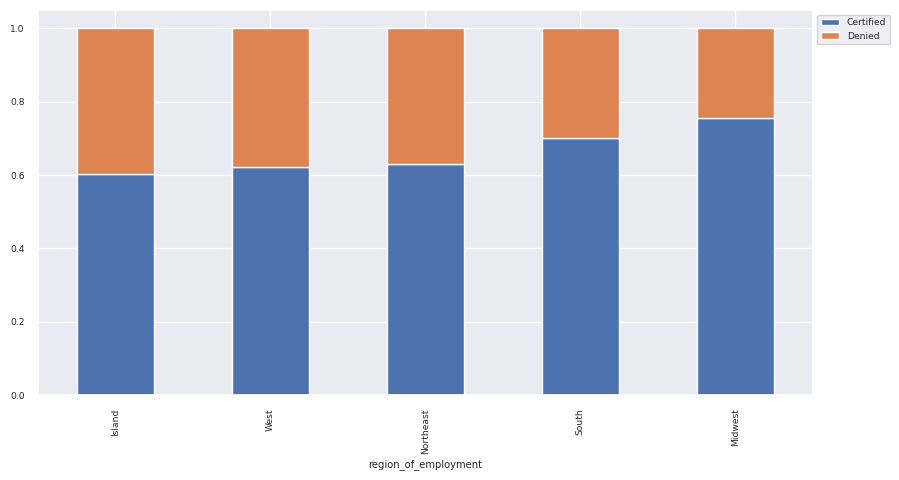

In [340]:
stacked_barplot(data, "region_of_employment", "case_status")

**Observación:**
- La mayor tasa de aceptación de solicitudes de visa proviene de las regiones del medio oeste, sur, y noereste de Estados Unidos.
- La menor tasa de aceptación se encuentra en las regiones insulares y oeste.

#### Experiencia laboral y estado de la solicitud de visa

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


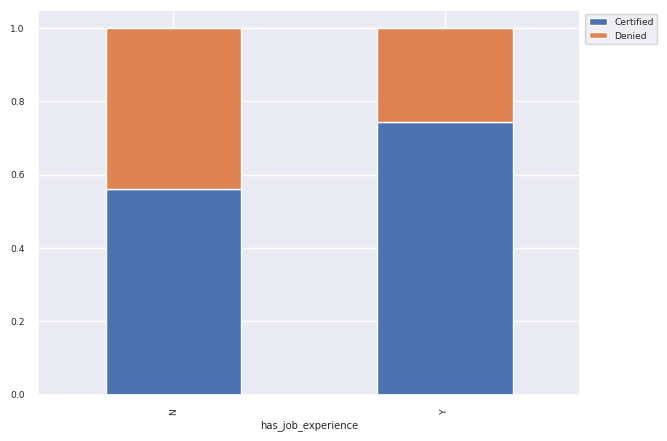

In [341]:
stacked_barplot(data, "has_job_experience", "case_status")

**Observación:**
- Según los datos, la tasa de aceptación de las solicitudes de visa es mucho mayor ~75% si la persona que postula tiene experiencia laboral previa.
- Por el contrario, poco más del ~56% son aceptados si no tienen experiencia laboral.

#### Forma de pago al empleado y estado de solicitud de visa

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


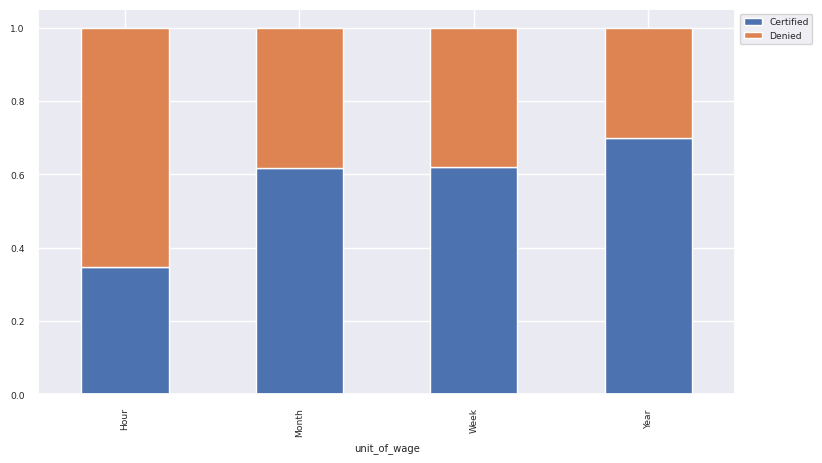

In [342]:
stacked_barplot(data, "unit_of_wage", "case_status")

**Observación:**
- Se observa que si la remuneración es ofrecida de manera anual, las probabilidades de aceptación de la solicitud de visa aumentan al ~70%.
- Del mismo modo, si el trabajo posee una remuneración por horas, posee un ~65% de probabilidad de que la solicitud de visa sea denegada.

#### Región del empleo y salario



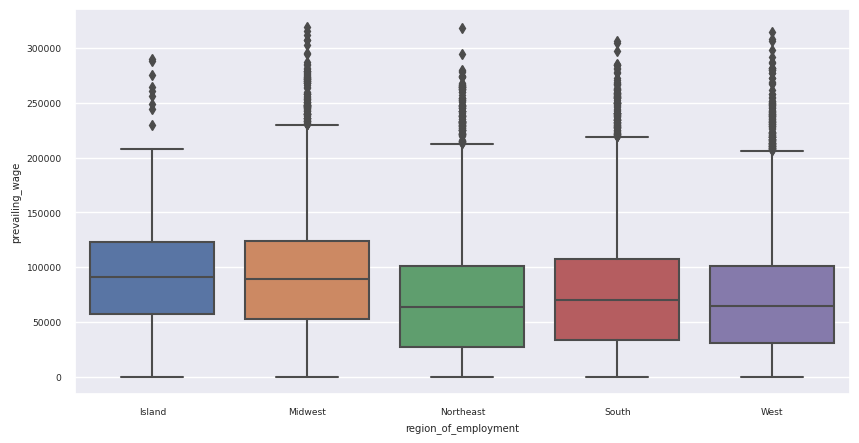

In [374]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

**Observación:**
- La media superior de los sueldos se encuentra en las regiones insulares y medio oeste.
- La región donde los sueldos son menores es el Noreste.

#### Distribución de los sueldos y el estado de aprobación de la solicitud de visa

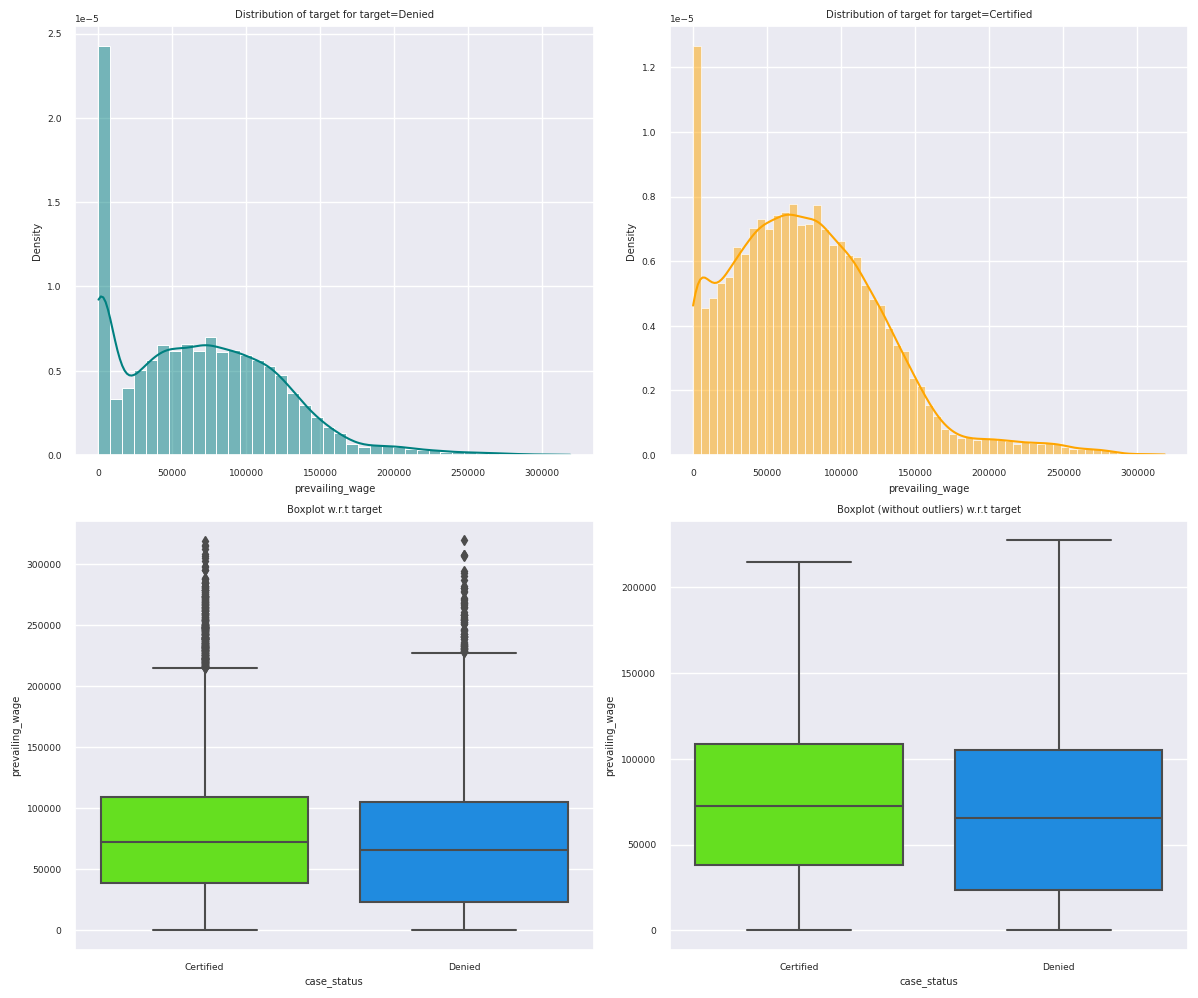

In [378]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

**Observación:**
- Ciertamente, la aprobación de solicitudes de visa va en directa relación con los salarios. Podemos inferir que a medida que el sueldo es mayor, no pagado en horas y que la persona se encuentra en posesión de un grado académico, es más probable que su solicitud sea aprobada.

## Preparación de los datos para el modelo

### Revisión de outliers en la data

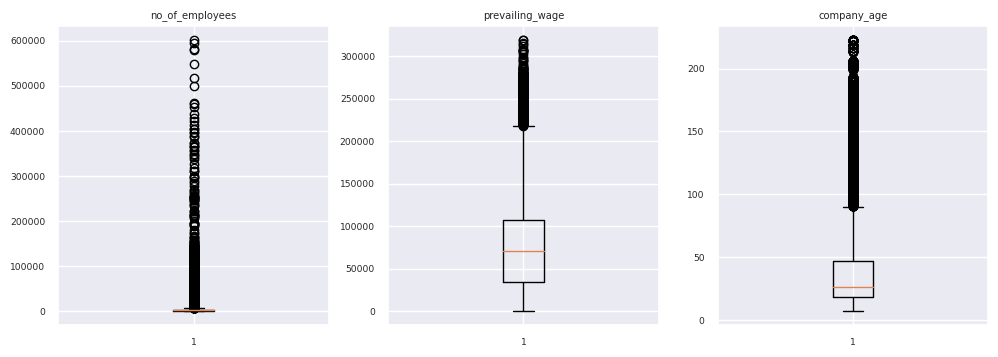

In [370]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 10))
for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)  # create boxplots for all the numeric columns
plt.show()

**Observación:**
- Claramente, las variables numéricas presentan una gran cantidad de outliers.
- De los 25,480 registros de la variable `no_of_employees` podemos ver que se encuentran sesgados hacia la derecha, evidenciada por un valor medio (mean) significativamente mayor que la mediana (50%), y un rango intercuartílico (IQR) amplio.
- En el caso de `prevailing_wage`, la media es mayor que la mediana, indicando una asimetría hacia la derecha. Esta asimetría está influida por la presencia de valores atípicos superiores, lo que sugiere una variabilidad significativa en los datos.
- En el caso de `company_age`, data la naturaleza de la variable parece no tener una presencia sustancial de outliers extremos.

### Convertimos la variable `case_status` a boolean, para permitir los análisis posteriores y quitamos `prevailing_wage`, según lo descrito anteriormente.

In [176]:
# Realizamos un label encoding para 'booking_status', debido a que es la variable objetivo
data['case_status'] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
# Quitamos la variable prevailing_wage que no aporta al análisis
data.drop(['prevailing_wage'], axis = 1, inplace = True)

### Codificamos las columnas categóricas para comenzar el análisis

In [156]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training',
                     'region_of_employment', 'unit_of_wage', 'full_time_position']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [177]:
# Verificamos la codificación de las variables
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,company_age
0,1,2,0,0,14513,4,0,1,0,16
1,1,3,1,0,2412,2,3,1,1,21
2,1,0,0,1,44444,4,3,1,0,15
3,1,0,0,0,98,4,3,1,0,126
4,0,3,1,0,1082,3,3,1,1,18


### Creación de los datos para entrenamiento y prueba

In [179]:
X = data.drop(["case_status"], axis=1)  # drop case status from the data
y = data["case_status"]

X = pd.get_dummies(X, drop_first=True)  # create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y
)  # split the data into train and test in the ratio 70:30

### Revisión de la separación de los datos entre entranamiento y prueba

In [180]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (19110, 9)
Shape of test set :  (6370, 9)
Percentage of classes in training set:
1    0.66787
0    0.33213
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


**Observaciones:**
- Los datos fueron separados en un 70% y 30% entre datos de entranamieto y prueba respectivamente y de manera estratificada.
- Claramente, la variable dependiente se encuentra desbalanceada. Lo anterior, implica que deba tratase cuando se realice el análisis de los datos.

### Justificación de la elección de la métrica a utilizar

Es importante volver a justificar el porqué utilizar F1-Score, luego de haber realizado el análisis uni y bi variado. Dado que:
- El modelo puede predecir erróneamente que la solicitud de visa será certificada, pero en realidad, la solicitud de visa debería ser denegada.
- O que el modelo prediga que la solicitud de visa no será certificada, pero en realidad, la solicitud de visa debería ser certificada.

De esta manera, cuanto mayor sea el puntaje F1, mayores serán las posibilidades de minimizar los falsos negativos y falsos positivos.

Utilizaremos pesos de clase equilibrados para que el modelo se enfoque de manera equitativa en ambas clases.

## Decision Tree model

### Realizamos un modelo sin hiperparámetris utilizando Árboles de decisión

In [181]:
# Decision Tree Model
model = DecisionTreeClassifier(
    random_state=1
)  # define decision tree classifier with random state = 1
model.fit(X_train, y_train)  # fit decision tree classifier on the train data

DecisionTreeClassifier(random_state=1)

#### Probamos el rendimiento del modelo en los datos de entranamiento

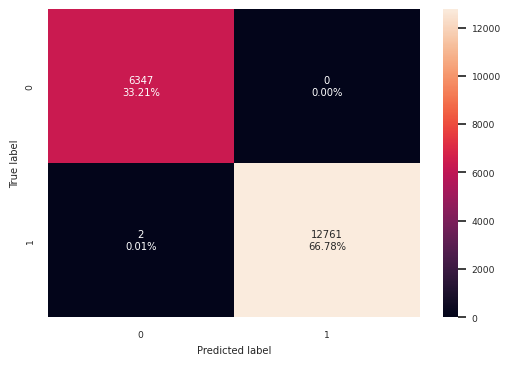

In [182]:
confusion_matrix_sklearn(
    model, X_train, y_train
)  # create confusion matrix for train data

In [183]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)  # check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.999895,0.999843,1.0,0.999922


#### Probamos el rendimiento del modelo en los datos de prueba

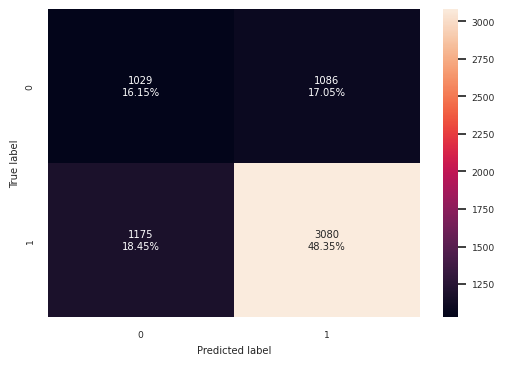

In [184]:
confusion_matrix_sklearn(model, X_test, y_test)  # create confusion matrix for test data

In [185]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) # check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.645055,0.723854,0.739318,0.731505


**Observaciones:**
- Claramente, el modelo tiene overfitting en la data de entranamiento, lo que luego se ve reflejado en los datos de prueba
- Debemos trabajar con los hiperparámetros para ajustar el modelo

### Ajustamos el Decision Tree con hiperparámetros

In [191]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 10, 15),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=5, n_jobs=-1) # run grid search with n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Probamos el rendimiento del modelo con hiperparámetros en los datos de entranamiento

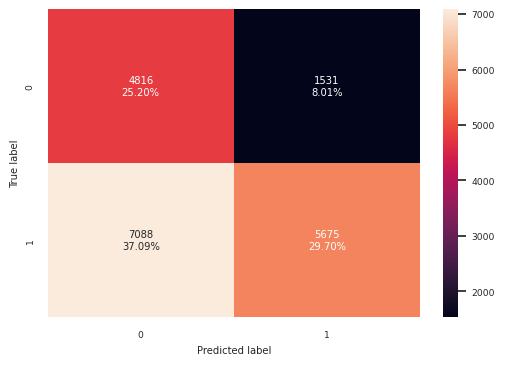

In [192]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [193]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999895,0.999843,1.0,0.999922


#### Probamos el redimiento del modelo con hiperparámetros en los datos de prueba

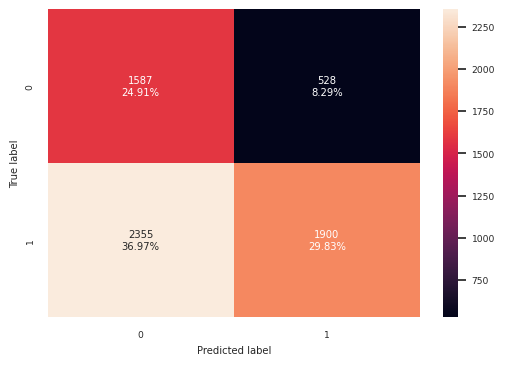

In [194]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [195]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) # check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.54741,0.446533,0.782537,0.568607


#### Variables más relevantes

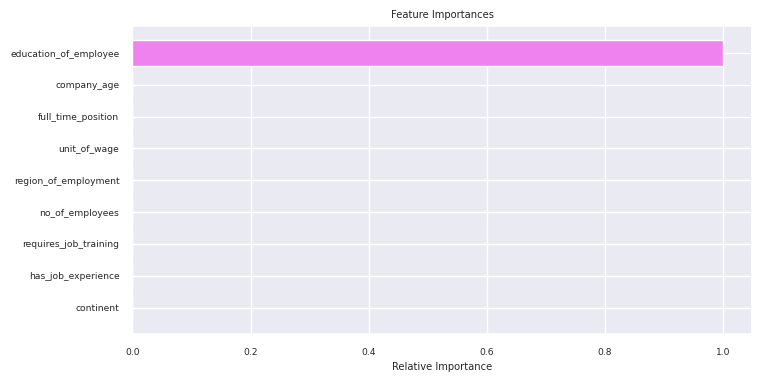

In [198]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observaciones:**
- El modelo con hiperparámetros no mejora en relación al anterior. Además, podemos ver que continúa con overfitting.
- El modelo continúa siendo malo para identificar correctamente como serán evaluadas las certificaciones de visa.
- Sin embargo, podemos ver que la variable más relevante es la educación del empleado al momento de realizar la aplicación. Esto puede ser relevante para futuros modelos.
- Es neceario trabajar en nuevos modelos.

## Modelos bagging & boosting sin hiperparámetros


### Bagging Classifier model

In [200]:
bagging_classifier = BaggingClassifier(
    random_state=1
)  # define bagging classifier with random state = 1
bagging_classifier.fit(X_train, y_train)  # fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Verificación del rendimiento del modelo con datos de entrenamiento

In [201]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)  # check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.982261,0.982919,0.990447,0.986669


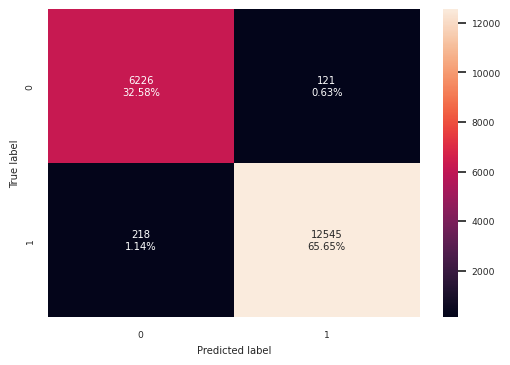

In [202]:
confusion_matrix_sklearn(
    bagging_classifier, X_train, y_train
)  # create confusion matrix for train data

#### Verificación del rendimiento del modelo con datos de prueba

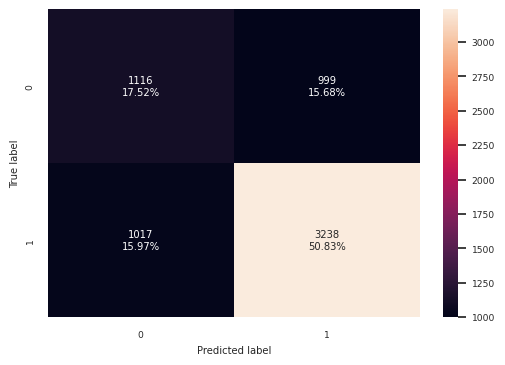

In [203]:
confusion_matrix_sklearn(
    bagging_classifier, X_test, y_test
)  # create confusion matrix for test data

In [204]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.683516,0.760987,0.76422,0.7626


**Observaciones:**
- Bagging presenta un alto overfitting en la data de entrenamiento
- Si bien el modelo posee un F1-Score que pudiese generalizarse, es preferible revisar nuevos modelos, así como volver a correr Bagging con hiperparámetros optimizados.

### Random Forest model

In [214]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight = 'balanced') # define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train, y_train) # fit random forest on the train data

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Verificación del rendimiento del modelo con datos de entrenamiento

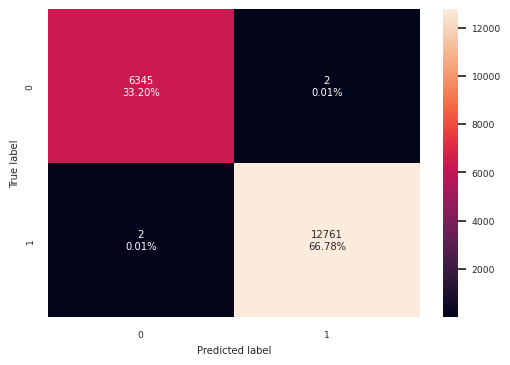

In [215]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train) # create confusion matrix for train data

In [216]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) # check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999791,0.999843,0.999843,0.999843


#### Verificación del rendimiento del modelo con datos de prueba

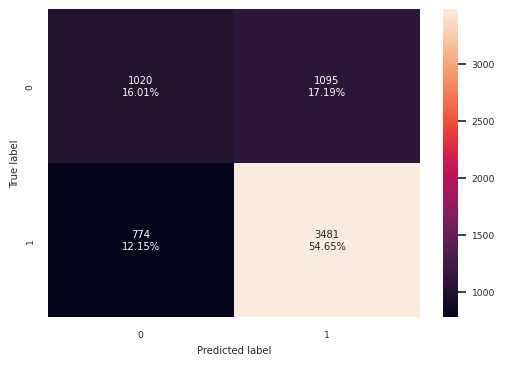

In [217]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) # create confusion matrix for test data

In [218]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) # check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706593,0.818096,0.760708,0.788359


**Observaciones:**
- Ambos modelos (Bagging y Random Forest) presentan un alto overfitting en la data de entrenamiento
- Sin embargo, Random Forest tiene un mejor rendiminento para la tomade decisiones relacionadas con la aprobación de visas.
- Random Forest tiene un F1-Score alto (que es lo que estamos buscando). Adicionalmente, un Recall alto que nos permitiría identificar correctamente a quienes no deberíamos darles visas. En el caso de la Precisión, en ambos modelos es similar.

### AdaBoost Classifier model

In [219]:
ab_classifier = AdaBoostClassifier(random_state=1) # define AdaBoost Classifier with random state = 1
ab_classifier.fit(X_train, y_train) # fit AdaBoost Classifier on the train data

AdaBoostClassifier(random_state=1)

#### Verificación del rendimiento del modelo con datos de entrenamiento





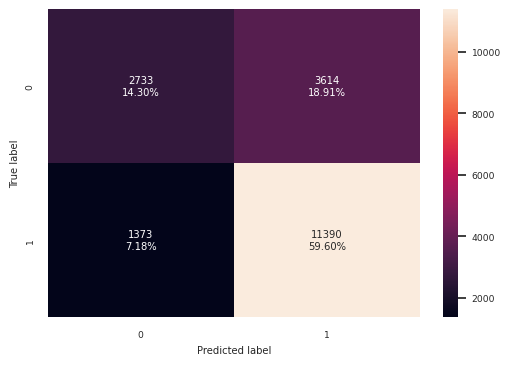

In [220]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train) # create confusion matrix for train data

In [221]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.739037,0.892423,0.759131,0.820398


#### Verificación del rendimiento del modelo con datos de prueba

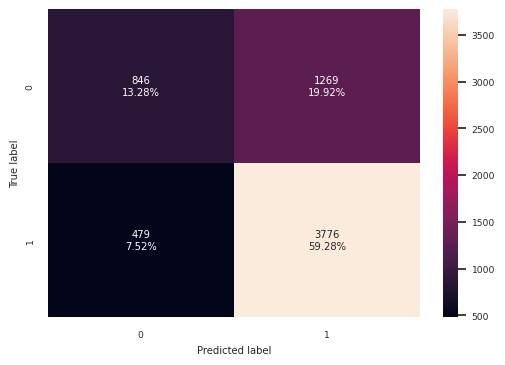

In [222]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test) # create confusion matrix for test data

In [223]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test) # check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.725589,0.887427,0.748464,0.812043


**Observaciones:**
- Utilizando AdaBoost sin hiperparámetros se logra un modelo más estable.
- No existe overfitting en el modelo y en ambos tipos de datos (entrenamiento y prueba), existe un F1-Score por sobre el ~81%

### Gradient Boosting Classifier model


In [224]:
gb_classifier = GradientBoostingClassifier(random_state=1) # define Gradient Boosting Classifier with random state = 1
gb_classifier.fit(X_train, y_train) # fit Gradient Boosting Classifier on the train data

GradientBoostingClassifier(random_state=1)

#### Verificación del rendimiento del modelo con datos de entrenamiento

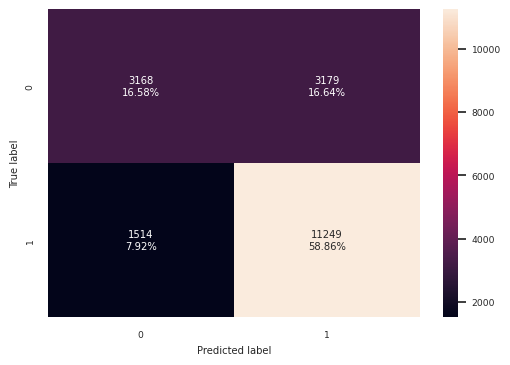

In [226]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train) # create confusion matrix for train data

In [227]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train) # check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754422,0.881376,0.779665,0.827406


#### Verificación del rendimiento del modelo con datos de prueba

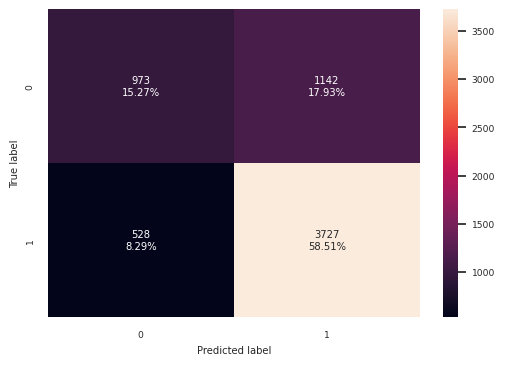

In [228]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)  # create confusion matrix for test data

In [229]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test) # check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.737834,0.875911,0.765455,0.816966


**Observaciones:**
- El modelo generado con Gradient Boosting no posee overfitting y es similar a AdaBoost para la métrica F1-Score.
- En el caso de Recall los valores son similares a AdaBoost. Sin embargo, Gradient Boosting posee una Accuracy más alta.

### XGBoost Classifier model

In [230]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss') # define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier.fit(X_train, y_train) # fit XGBoost Classifier on the train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

#### Verificación del rendimiento del modelo con datos de entrenamiento

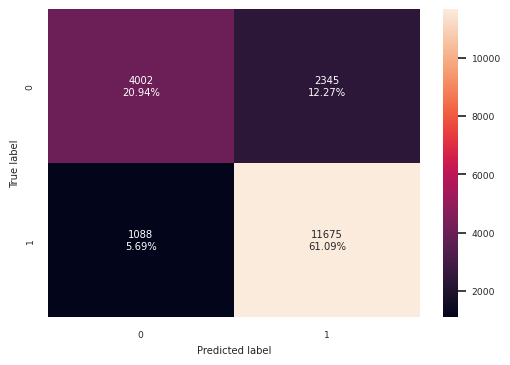

In [231]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train) # create confusion matrix for train data

In [232]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train) # check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.820356,0.914754,0.832739,0.871822


#### Verificación del rendimiento del modelo con datos de prueba

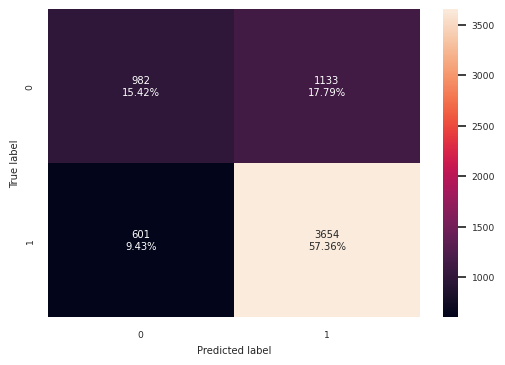

In [233]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test) # create confusion matrix for test data

In [234]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test) # check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727786,0.858754,0.763317,0.808228


**Observaciones:**
- XGBoost no presenta overfitting con los datos de entranamiento.
- El modelo es bueno para realizar la idenficación correcta de las personas a las cuales se les puede entregar visa. Sin embargo, no representa una mejoría en relación a Gradient Boosting.

### Stacking Model Classifier model

In [237]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gb_classifier),
    ("Random Forest", rf_estimator),
]

final_estimator = xgb_classifier
stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator) # define Stacking Classifier
stacking_classifier.fit(X_train, y_train) # fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsamp...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

#### Verificación del rendimiento del modelo con datos de entrenamiento

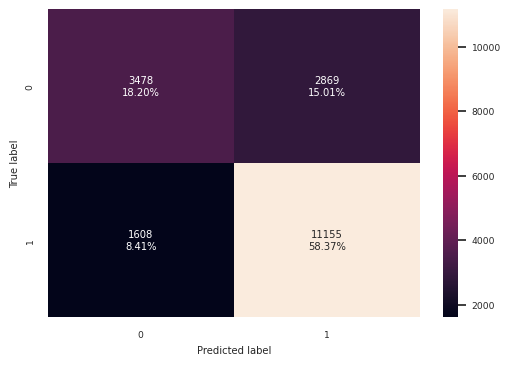

In [238]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train) # create confusion matrix for train data

In [239]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train) # check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765725,0.874011,0.795422,0.832867


#### Verificación del rendimiento del modelo con datos de prueba

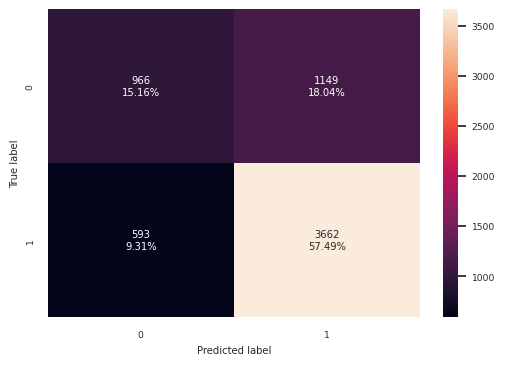

In [240]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test) # create confusion matrix for test data

In [241]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test) # check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.726531,0.860635,0.761172,0.807854


**Observaciones:**
- El modelo Stacking Classifier no presenta overfitting en los datos de entranmiento.
- Sin embargo, su rendimineto es levemente inferior en terminos de F1-Score, Accuracy, Recall & Precision. Lo anterior, también provoca que tenga un F1-Score levemente inferior.
- Es interesante analizar que ocurriría con los modelos si ajustarámos los hiperparámetros

## Optimizando los modelos bagging y boosting con hiperparámetros

### Optimizando Bagging model

In [268]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5) # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

#### Verificación del rendimiento del modelo con datos de entrenamiento

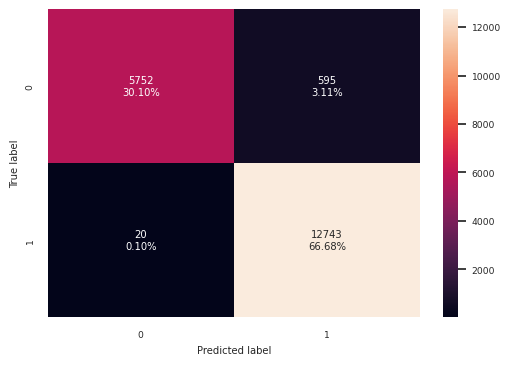

In [269]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_train, y_train
)   # create confusion matrix for train data on tuned estimator

In [270]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) # check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.967818,0.998433,0.955391,0.976438


#### Verificación del rendimiento del modelo con datos de prueba

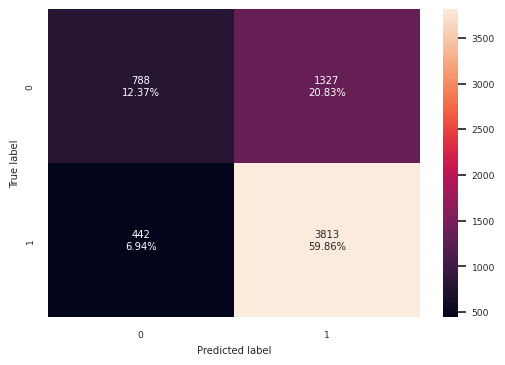

In [271]:
confusion_matrix_sklearn(
    bagging_estimator_tuned, X_test, y_test
) # create confusion matrix for test data on tuned estimator

In [272]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) # check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.722292,0.896122,0.741829,0.811708


**Observaciones:**
- El modelo Bagging con hiperparámetros optimizados mejora ostensiblemente versus la versión sin optimizar.
- Sin embargo, aún posee un alto overfitting en la data de entrenamiento. Si bien es mejor a la que posee el modelo sin hiperparámtros, es necesario considerar otros modelos para generalizar.

### Optimizando Random Forest model

In [257]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 15],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5,n_jobs=-1) ## Complete the code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=25,
                       oob_score=True, random_state=1)

#### Verificación del rendimiento del modelo con datos de entrenamiento

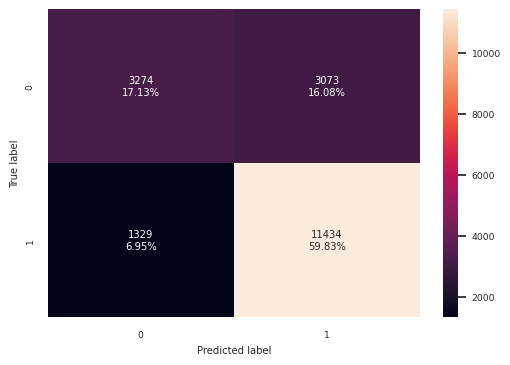

In [258]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [259]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) # check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769649,0.895871,0.788171,0.838577


#### Verificación del rendimiento del modelo con datos de prueba

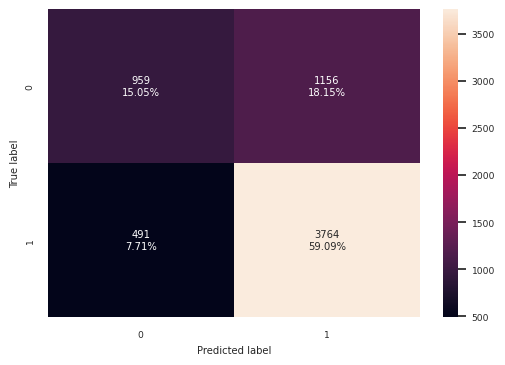

In [260]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [261]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) # check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741444,0.884606,0.765041,0.82049


**Observaciones:**
- El modelo con Random Forest optimizando los hiperparámetros es mucho más certero que el sin optimización.
- El nuevo modelo tiene un alto F1-Score lo que nos permite usarlo para generalizar la data
- A diferencia del modelo sin hiperparámetros, este modelo no posee overfitting en los datos de entrenamiento.

### Optimizando AdaBoost Classifier model

In [262]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5) # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.4, n_estimators=80, random_state=1)

#### Verificación del rendimiento del modelo con datos de entrenamiento

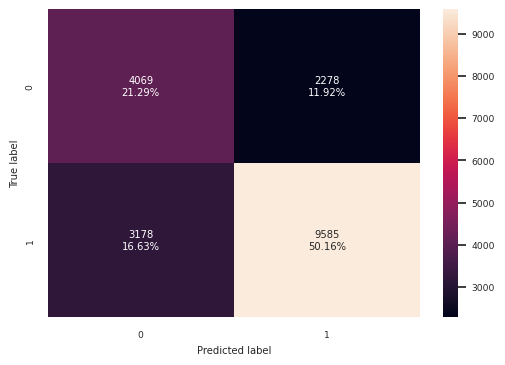

In [263]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [264]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) # check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.714495,0.750999,0.807974,0.778446


#### Verificación del rendimiento del modelo con datos de prueba

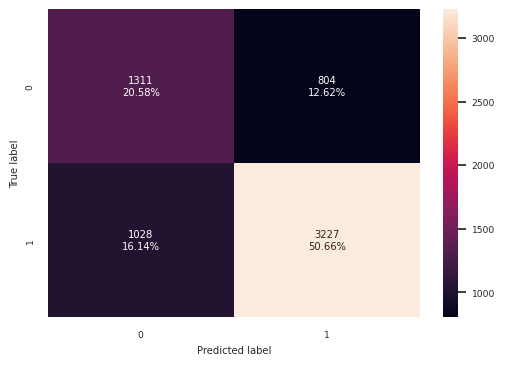

In [265]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [266]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test) # check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.712402,0.758402,0.800546,0.778904


**Observaciones:**
- El modelo AdaBoost con los hiperparámetros optimizados tiene un ligero decrimento en términos de performance comparado con el modelo sin hiperparámetros.
- Si bien no existe overfitting con los datos de entrenamiento en este nuevo modelo, su F1-Score baja de un ~81% a un ~77% en los datos de prueba.
- El resto de las métricas igual tienen rendimiento inferior, salvo en el caso de Precision que aumenta de 74% a 80%. Sin embargo, no es la métrica que buscamos optimizar en el caso de las visas.

### Optimizando Gradient Boosting Classifier model

In [242]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5) # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

#### Verificación del rendimiento del modelo con datos de entrenamiento


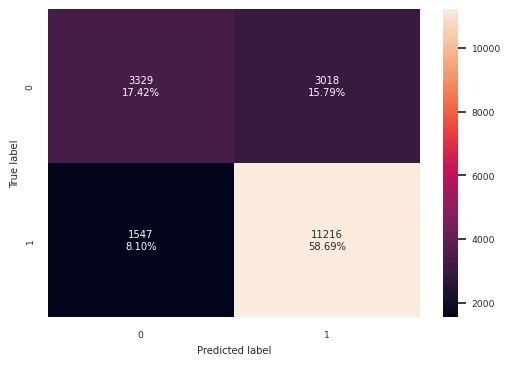

In [243]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)  # create confusion matrix for train data on tuned estimator

In [244]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train) # check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76112,0.87879,0.787972,0.830907


#### Verificación del rendimiento del modelo con datos de prueba

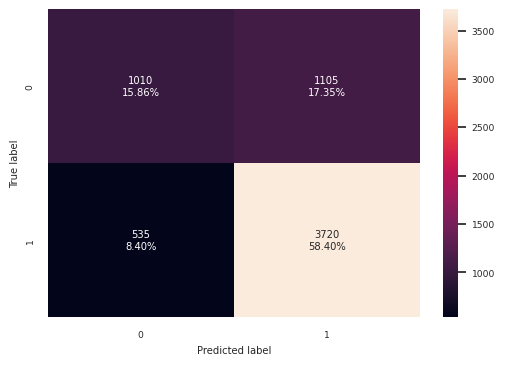

In [245]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)   # create confusion matrix for test data on tuned estimator

In [246]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test) # check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742543,0.874266,0.770984,0.819383


#### Características más relevantes

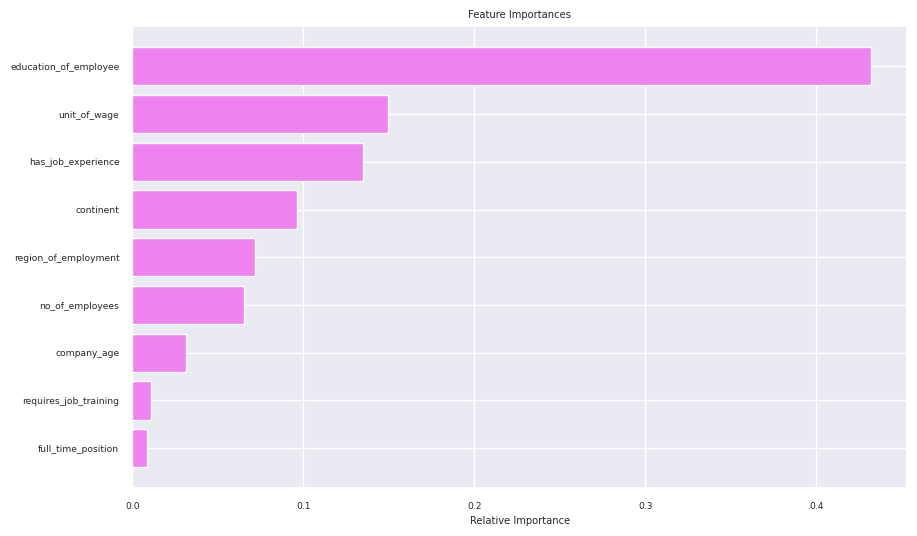

In [248]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observaciones:**
- El nuevo GradientBoost con hiperparámetros es levemente mejor que el sin hiperpáramtros. Si bien no existe una diferencia muy grande en términos de rendimiento, se ha aumentado el F1-Score de 81.6% a ~81.9%.
- El modelo GradientBoost con hiperparámetros tiene un rendimineto levemente inferior con relación a Random Forest con los hiperparámetros optimizados.

### Optimizando XGBoost Classifier model

In [249]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)  # run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train) # fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

#### Verificación del rendimiento del modelo con datos de entrenamiento

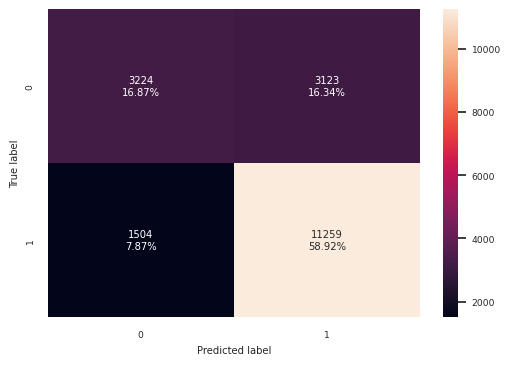

In [250]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train) # create confusion matrix for train data on tuned estimator

In [251]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) # check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.757875,0.882159,0.782854,0.829545


#### Verificación del rendimiento del modelo con datos de prueba

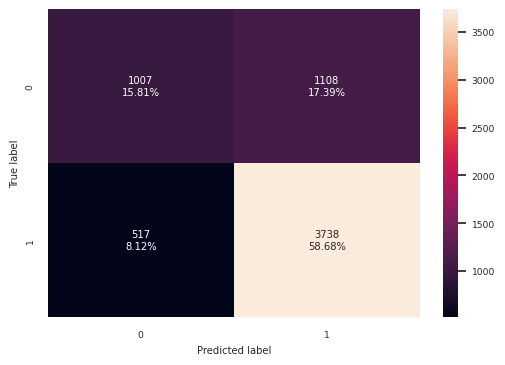

In [252]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test) # create confusion matrix for test data on tuned estimator

In [253]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) # check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.878496,0.771358,0.821448


### Características más relevantes

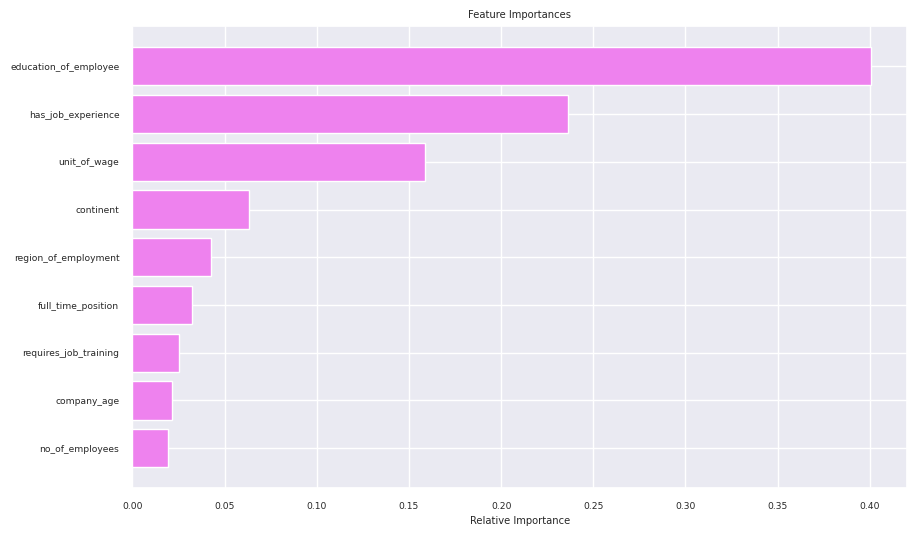

In [255]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observaciones:**
- El modelo XGBoost Classifier optimizado mejora bastante con relación al modelo sin los hisperparámtros optimizados.
- El modelo nuevo tampoco posee overfitting en los datos de entrenamiento, al igual que su versión sin optimizar.
- En términos generales, este modelo posee un rendimiento levemente superior a Random Forest optimizado, en términos de la métrica F1-Score que es la que buscamos optimizar.
- Las característimcas más relevantes para el modelo son la educación del trabajador, la experiencia previa al trabajo y cómo recibirá el sueldo. Las menos relevanetes, son el número de empleados que tiene la compañía, la antigüedad de la empresa y si el trabajo requiere una capacitación especial.

### Optimizando Stacking Classifier model

In [380]:
estimators_tuned = [
    ("AdaBoost Tuned", abc_tuned),
    ("Gradient Boosting Tuned", gbc_tuned),
    ("Random Forest Tuned", rf_tuned),
]

final_estimator_tuned = xgb_tuned
stc_tuned = StackingClassifier(estimators=estimators_tuned,final_estimator=final_estimator_tuned) # define Stacking Classifier
stc_tuned.fit(X_train, y_train) # fit Stacking Classifier on the train data

StackingClassifier(estimators=[('AdaBoost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.4,
                                                   n_estimators=80,
                                                   random_state=1)),
                               ('Gradient Boosting Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           s...
                                                 feature_types=None, gamma=5,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

#### Verificación del rendimiento del modelo con datos de entrenamiento

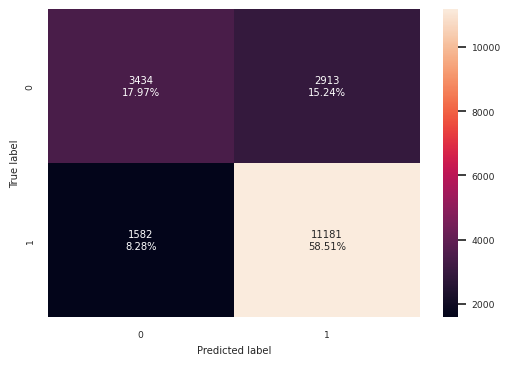

In [381]:
confusion_matrix_sklearn(stc_tuned, X_train, y_train) # create confusion matrix for train data

In [382]:
stc_tuned_model_train_perf = model_performance_classification_sklearn(stc_tuned, X_train, y_train) # check performance on train data
stc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764783,0.876048,0.793316,0.832632


#### Verificación del rendimiento del modelo con datos de prueba

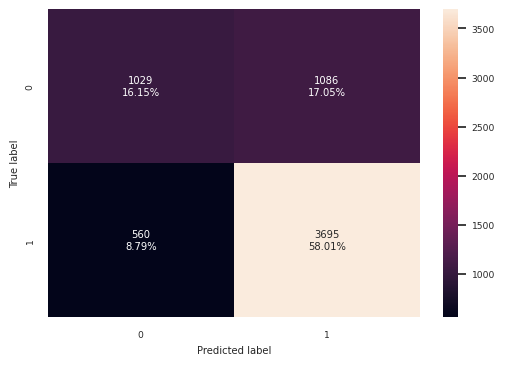

In [383]:
confusion_matrix_sklearn(stc_tuned, X_test, y_test) # create confusion matrix for train data

In [384]:
stc_tuned_model_test_perf  = model_performance_classification_sklearn(stc_tuned, X_test, y_test) # check performance for test data
stc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741601,0.86839,0.772851,0.81784


**Observaciones:**
- El modelo optimizado de Stacking Classifier presenta un mejor rendimineto que su versión sin optimización de hiperparámetros. En datos de prueba, F1-Score pasa de un ~80.7% a un ~81.7%.
- Del mismo modo, el Recall también ha subido levemente.
- Al igual que el anterior, este modelo optimizado de Stacking Classifier, permite generalizar los datos y entregando un buen rendimiento, especialmente equilibrando la precisión y el recall.

## Comparación de rendimiento del modelo y conclusiones

### Comparando todos los modelos con sus datos de entrenamiento

In [387]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
        stc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
    "Stacking Classifier",
    "Tuned Stacking Classifier"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Tuned XGBoost Classifier,Stacking Classifier,Tuned Stacking Classifier
Accuracy,0.999895,0.999895,0.982261,0.967818,0.999791,0.769649,0.739037,0.714495,0.754422,0.761120,0.820356,0.757875,0.765725,0.764783
Recall,0.999843,0.999843,0.982919,0.998433,0.999843,0.895871,0.892423,0.750999,0.881376,0.878790,0.914754,0.882159,0.874011,0.876048
Precision,1.000000,1.000000,0.990447,0.955391,0.999843,0.788171,0.759131,0.807974,0.779665,0.787972,0.832739,0.782854,0.795422,0.793316
F1,0.999922,0.999922,0.986669,0.976438,0.999843,0.838577,0.820398,0.778446,0.827406,0.830907,0.871822,0.829545,0.832867,0.832632


### Comparando todos los modelos con sus datos de prueba

In [388]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
        stc_tuned_model_test_perf.T,
        ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Tuned XGBoost Classifier",
    "Stacking Classifier",
    "Tuned Stacking Classifier"
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Tuned XGBoost Classifier,Stacking Classifier,Tuned Stacking Classifier
Accuracy,0.645055,0.547410,0.683516,0.722292,0.706593,0.741444,0.725589,0.712402,0.737834,0.742543,0.727786,0.744898,0.726531,0.741601
Recall,0.723854,0.446533,0.760987,0.896122,0.818096,0.884606,0.887427,0.758402,0.875911,0.874266,0.858754,0.878496,0.860635,0.868390
Precision,0.739318,0.782537,0.764220,0.741829,0.760708,0.765041,0.748464,0.800546,0.765455,0.770984,0.763317,0.771358,0.761172,0.772851
F1,0.731505,0.568607,0.762600,0.811708,0.788359,0.820490,0.812043,0.778904,0.816966,0.819383,0.808228,0.821448,0.807854,0.817840


### Conclusiones en relación a los modelos analizados
- Decision Tree, Bagging classifier & Random Forest tienen overfitting con los datos de entrenamiento.
- Sin embargo, luego de optimizar los hiperparámetros, todos los modelos dejan de tener overfitting en los datos de entrenamiento (Modelos Optimizados)
- Los modelos que mejor optimizan la métrica F1-Score en los datos de prueba son Tuned XGBoost Classifier, Tuned Random Forest, Tuned Stacking Classifier y Tuned Gradient Boost Classifier, todos después de haber optimizado sus hiperparámetros.
- Estos modelos con F1-Score sobre 0.8 sugieren un buen rendimiento para encontrar un equilibrio efectivo entre la capacidad de clasificar correctamente ejemplos positivos y la capacidad de evitar falsos positivos, es decir, el puntaje refleja la capacidad del modelo para identificar correctamente los casos de aprobación de visas y minimizar los falsos positivos.

## Información práctica y recomendaciones
Para este análisis se consideraron datos de 25,480 aplicaciones a VISAS de trabajo. El objetivo de la investigación es desarrollar un modelo de aprendizaje automático que, utilizando datos relacionados con solicitudes de visa, facilite el proceso de aprobación al preseleccionar candidatos con mayores probabilidades de obtener la certificación de visa, minimizando así errores críticos en las predicciones.

Es importante notar que el trabajo de análisis que subyace este trabajo, implica que la recopilación de datos debe estar enfocada en tres aspectos relevantes:
- ***Educación del Trabajador***: Es importante prestar especial atención a la educación del trabajador, ya que es una característica altamente relevante. Es importante que la OFLC sea capaz de recopilar y mantener datos precisos y actualizados sobre la educación de los solicitantes.
- ***Experiencia Laboral***: La experiencia laboral es una característica clave. Es necesario que la OFLC registre con consistencia y precisión de los registros de experiencia laboral en las solicitudes de visa.
- ***Forma de Recibir el Salario***: La forma en que se recibe el salario es una característica relevante. Es probable que si la oferta de empleo es anual, tenga más probabilidades de recibir visa que aquellos que no.

Por otro lado, llama la atención que percepciones inicales con relación a la longevidad de la compañia o el número de empleados que la componen, tiene baja relevancia a la hora que la OFLC se decida en tomar una decisión.

Con base en los datos mostrados y el rendimiento del modelo, se sugiere que la OFLC considere implementar este modelo como una herramienta complementaria en el proceso de revisión de solicitudes de visa.

El modelo puede ser utilizado para preseleccionar candidatos con mayores probabilidades de aprobación, agilizando así el proceso de revisión manual. Es importante tener en cuenta que, aunque el modelo puede ser valioso (F1-Score > 0.82), siempre debe ser utilizado como una ayuda para la toma de decisiones, y las decisiones finales deben seguir siendo evaluadas por expertos humanos en inmigración y cumplimiento legal.

Además, se recomienda monitorear continuamente el rendimiento del modelo y actualizarlo según sea necesario para mantener su eficacia a lo largo del tiempo.